# Classification. Linear models and KNN

In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import plot_confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder

## Part 1: Implementing Logistic Regression

In this task you need to implement Logistic Regression with l2 regularization using gradient descent algorithm.

Logistic Regression loss:
$$ L(w) = \dfrac{1}{N}\sum_{i=1}^N \log(1 + e^{-\langle w, x_i \rangle y_i}) + \frac{1}{2C} \lVert w \rVert^2  \to \min_w$$
$$\langle w, x_i \rangle = \sum_{j=1}^n w_{j}x_{ij} + w_{0},$$ $$ y_{i} \in \{-1, 1\}$$ where $n$ is the number of features and $N$ is the number of samples.

Gradient descent step:
$$w^{(t+1)} := w^{(t)} + \dfrac{\eta}{N}\sum_{i=1}^N y_ix_i \Big(1 - \dfrac{1}{1 + exp(-\langle w^{(t)}, x_i \rangle y_i)}\Big) - \eta \frac{1}{C} w,$$
where $\eta$ is the learning rate.

**(2 points)** Implement the algorithm and use it to classify the digits (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) into "even" and "odd" categories. "Even" and "Odd" classes  should correspond to {-1, 1} labels.

Stopping criteria: either the number of iterations exceeds *max_iter* or $||w^{(t+1)} - w^{(t)}||_2 < tol$.

In [3]:
from sklearn.exceptions import NotFittedError

In [4]:
class CustomLogisticRegression:
    _estimator_type = "classifier"
    
    def __init__(self, eta=0.001, max_iter=1000, C=1.0, tol=1e-5, random_state=42, zero_init=False):
        """Logistic Regression classifier.
        
        Args:
            eta: float, default=0.001
                Learning rate.
            max_iter: int, default=1000
                Maximum number of iterations taken for the solvers to converge.
            C: float, default=1.0
                Inverse of regularization strength; must be a positive float.
                Smaller values specify stronger regularization.
            tol: float, default=1e-5
                Tolerance for stopping criteria.
            random_state: int, default=42
                Random state.
            zero_init: bool, default=False
                Zero weight initialization.
        """
        self.eta = eta
        self.max_iter = max_iter
        self.C = C
        self.tol = tol
        self.random_state = np.random.RandomState(seed=random_state)
        self.zero_init = zero_init
         
    def get_sigmoid(self, X, weights):
        """Compute the sigmoid value."""
        # <your code>
        pass
    
    def get_loss(self, x, weights, y):
        """Calculate the loss."""
        # <your code>
        pass
     
    def fit(self, X, y):
        """Fit the model.
        
        Args:
            X: numpy array of shape (n_samples, n_features)
            y: numpy array of shape (n_samples,)
                Target vector.        
        """
        X_ext = np.hstack([np.ones((X.shape[0], 1)), X]) # a constant feature is included to handle intercept
        num_features = X_ext.shape[1]
        if self.zero_init:
            self.weights_ = np.zeros(num_features) 
        else:
            weight_threshold = 1.0 / (2 * num_features)
            self.weights_ = self.random_state.uniform(low=-weight_threshold,
                                                      high=weight_threshold, size=num_features) # random weight initialization
        
        for i in range(self.max_iter):
            delta = "<your code>"
            self.weights_ -= self.eta * delta
            if "<your code>":
                break
     
    def predict_proba(self, X):
        """Predict positive class probabilities.
        
        Args:
            X: numpy array of shape (n_samples, n_features)
        Returns:
            y: numpy array of shape (n_samples,)
                Vector containing positive class probabilities.
        """
        X_ext = np.hstack([np.ones((X.shape[0], 1)), X])
        if hasattr(self, 'weights_'):
            return self.get_sigmoid(X_ext, self.weights_)
        else: 
            raise NotFittedError("CustomLogisticRegression instance is not fitted yet")
    
    def predict(self, X):
        """Predict classes.
        
        Args:
            X: numpy array of shape (n_samples, n_features)
        Returns:
            y: numpy array of shape (n_samples,)
                Vector containing predicted class labels.
        """
        # <your code>
        pass

In [5]:
from sklearn import datasets
from sklearn import metrics

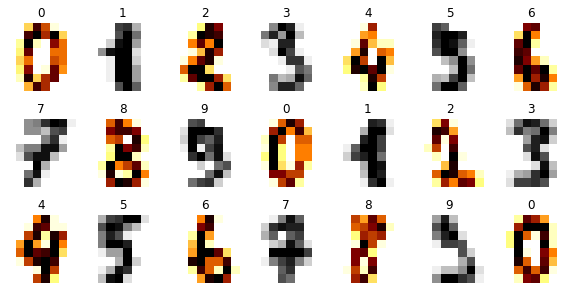

In [6]:
X, y = datasets.load_digits(n_class=10, return_X_y=True)

_, axes = plt.subplots(nrows=3, ncols=7, figsize=(10, 5))
for ax, image, label in zip(axes.flatten(), X, y):
    ax.set_axis_off()
    ax.imshow(image.reshape((8, 8)), cmap=plt.cm.gray_r if label % 2 else plt.cm.afmhot_r)
    ax.set_title(label)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
#y_train = "<your code>"
#y_test = "<your code>"
y_train = (y_train % 2) * 2 - 1
y_test = (y_test % 2) * 2 - 1

In [7]:
assert (np.unique(y_train) == [-1, 1]).all()
assert (np.unique(y_test) == [-1, 1]).all()

In [8]:
def fit_evaluate(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    disp = metrics.plot_confusion_matrix(clf, X_test, y_test, normalize='true')
    disp.figure_.suptitle("Confusion Matrix")
    plt.show()
    
    return metrics.accuracy_score(y_pred=clf.predict(X_train), y_true=y_train), \
           metrics.accuracy_score(y_pred=clf.predict(X_test), y_true=y_test)

In [9]:
lr_clf = CustomLogisticRegression(max_iter=1, zero_init=True)

In [10]:
assert np.allclose(lr_clf.get_sigmoid(np.array([[0.5, 0, 1.0], [0.3, 1.3, 1.0]]), np.array([0.5, -0.5, 0.1])),
                   np.array([0.58662, 0.40131]))

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
lr_clf.fit(X_train, y_train)

In [ ]:
assert np.allclose(lr_clf.weights_, np.array([ 3.1000e-06,  0.0000e+00,  4.1800e-05,  5.4770e-04,  2.2130e-04,
        4.8750e-04,  1.3577e-03,  5.9780e-04,  5.6400e-05, -7.0000e-07,
        1.6910e-04,  2.5190e-04, -4.3700e-04,  3.6190e-04,  1.0049e-03,
        4.2280e-04,  2.5700e-05,  3.0000e-07, -1.1500e-05, -7.2440e-04,
       -2.6200e-04,  8.7540e-04,  4.1540e-04, -8.4200e-05, -5.2000e-06,
        0.0000e+00, -2.2160e-04, -5.7130e-04,  9.8570e-04,  1.3507e-03,
        5.0210e-04, -1.7050e-04, -1.0000e-06,  0.0000e+00, -6.7810e-04,
       -1.0515e-03, -4.4500e-05,  3.7160e-04,  4.2100e-04, -8.1800e-05,
        0.0000e+00, -5.2000e-06, -5.3410e-04, -2.0393e-03, -8.4310e-04,
        1.0400e-04, -1.2390e-04, -1.7880e-04, -1.3200e-05, -4.5000e-06,
       -9.4300e-05, -1.1127e-03, -5.0900e-04, -2.1850e-04, -5.6050e-04,
       -3.9560e-04, -1.7700e-05, -3.0000e-07,  2.6800e-05,  6.3920e-04,
        1.8090e-04, -7.3660e-04, -5.3930e-04, -3.7060e-04, -2.8200e-05]), atol=1e-5)

In [11]:
model = CustomLogisticRegression()

In [12]:
train_acc, test_acc = fit_evaluate(model, X_train, y_train, X_test, y_test)

TypeError: can't multiply sequence by non-int of type 'float'

In [13]:
train_acc, test_acc

NameError: name 'train_acc' is not defined

In [ ]:
assert min(train_acc, test_acc) > 0.9

**(0.5 points)** Visualize the loss history.

In [ ]:
## your code

**(0.5 points)** Try different learning rates and compare the results. How does the learning rate influence the convergence?

In [ ]:
## your code

< your thoughts >

**(0.5 points)** Try different regularization parameter values and compare the model quality.

In [ ]:
## your code

< your thoughts >

**(0.5 points)** Compare zero initialization and random initialization. 

In [ ]:
## your code

< your thoughts >

## Part 2: Implementing KNN Classifier

In this task you need to implement weighted K-Neighbors Classifier.

Recall that training a KNN classifier is simply memorizing a training sample. 

The process of applying a classifier for one object is to find the distances from it to all objects in the training data, then select the k nearest objects (neighbors) and return the most common class among these objects.

You can also give the nearest neighbors weights in accordance with the distance of the object to them. In the simplest case (as in your assignment), you can set the weights inversely proportional to that distance. 

$$w_{i} = \frac{1}{d_{i} + eps},$$

where $d_{i}$ is the distance between object and i-th nearest neighbor and $eps$ is the small value to prevent division by zero.

In case of 'uniform' weights, all k nearest neighbors are equivalent (have equal weight, for example $w_{i} = 1, \forall i \in(1,k)$).

To predict the probability of classes, it is necessary to normalize the weights of each class, dividing them by the sum:

$$p_{i} = \frac{w_{i}}{\sum_{j=1}^{c}w_{j}},$$

where $p_i$ is probability of i-th class and $c$ is the number of classes.

**(2 points)** Implement the algorithm and use it to classify the digits. By implementing this algorithm, you will be able to classify numbers not only into "even" or "odd", but into their real representation.

In [3]:
class CustomKNeighborsClassifier:
    _estimator_type = "classifier"
    
    def __init__(self, n_neighbors=5, weights='uniform', eps=1e-9):
        """K-Nearest Neighbors classifier.
        
        Args:
            n_neighbors: int, default=5
                Number of neighbors to use by default for :meth:`kneighbors` queries.
            weights : {'uniform', 'distance'} or callable, default='uniform'
                Weight function used in prediction.  Possible values:
                - 'uniform' : uniform weights.  All points in each neighborhood
                  are weighted equally.
                - 'distance' : weight points by the inverse of their distance.
                  in this case, closer neighbors of a query point will have a
                  greater influence than neighbors which are further away.
            eps : float, default=1e-5
                Epsilon to prevent division by 0 
        """
        self.n_neighbors = n_neighbors
        self.weights = weights
        self.eps = eps
        
    
    def get_pairwise_distances(self, X, Y):
        """
        Returnes matrix of the pairwise distances between the rows from both X and Y.
        Args:
            X: numpy array of shape (n_samples, n_features)
            Y: numpy array of shape (k_samples, n_features)
        Returns:
            P: numpy array of shape (n_samples, k_samples)
                Matrix in which (i, j) value is the distance 
                between i'th row from the X and j'th row from the Y.
        """
        num_test = X.shape[0]
        num_train = Y.shape[0]
        dists = np.zeros((num_test, num_train))
        for i in range(num_test):
            for j in range(num_train):
                dists[i, j] = np.sqrt(np.sum((X[i] - Y[j])**2))
        return dists
    
    
    def get_class_weights(self, y, weights):
        """
        Returns a vector with sum of weights for each class 
        Args:
            y: numpy array of shape (n_samples,)
            weights: numpy array of shape (n_samples,)
                The weights of the corresponding points of y.
        Returns:
            p: numpy array of shape (n_classes)
                Array where the value at the i-th position 
                corresponds to the weight of the i-th class.
        """
        w = 1 / (np.sqrt(np.sum(np.square(y-weights))) + self.eps)
        p = zip(y,w)
        return p
            
        
    def fit(self, X, y):
        """Fit the model.
        
        Args:
            X: numpy array of shape (n_samples, n_features)
            y: numpy array of shape (n_samples,)
                Target vector.        
        """
        self.points = X
        self.y = y
        self.classes_ = np.unique(y)
        
        
    def predict_proba(self, X):
        """Predict positive class probabilities.

        Args:
            X: numpy array of shape (n_samples, n_features)
        Returns:
            y: numpy array of shape (n_samples, n_classes)
                Vector containing positive class probabilities.
        """
        if hasattr(self, 'points'):
            P = self.get_pairwise_distances(X, self.points)

            weights_of_points = np.ones(P.shape)
            if self.weights == 'distance':
                weights_of_points = self.get_class_weights(self.points, self.weights)


            return

        else:
            raise NotFittedError("CustomKNeighborsClassifier instance is not fitted yet")
            
        
    def predict(self, X):
        """Predict classes.
        
        Args:
            X: numpy array of shape (n_samples, n_features)
        Returns:
            y: numpy array of shape (n_samples,)
                Vector containing predicted class labels.
        """
        if len(X.shape) == 1:
            X = X.reshape(-1,1)
        return self.intercept_ + np.dot(X, self.coef_)

In [4]:
model = CustomKNeighborsClassifier(n_neighbors=5, weights='distance')
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')

In [5]:
assert np.allclose(model.get_pairwise_distances(np.array([[0  , 1]  , [1, 1]]), 
                                                np.array([[0.5, 0.5], [1, 0]])),
                   np.array([[0.70710678, 1.41421356],
                             [0.70710678, 1.        ]]))

In [7]:
model.classes_ = ['one', 'two', 'three']
assert np.allclose(model.get_class_weights(np.array(['one', 'one', 'three', 'two']), np.array([1, 1, 0, 4])), 
                   np.array([2,4,0]))

UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('<U5'), dtype('int32')) -> None

In [8]:
X, y = datasets.load_digits(n_class=10, return_X_y=True)

_, axes = plt.subplots(nrows=3, ncols=7, figsize=(10, 5))
for ax, image, label in zip(axes.flatten(), X, y):
    ax.set_axis_off()
    ax.imshow(image.reshape((8, 8)), cmap=plt.cm.gray_r if label % 2 else plt.cm.afmhot_r)
    ax.set_title(label)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

NameError: name 'datasets' is not defined

In [9]:
model.fit(X_train, y_train)
knn.fit(X_train, list(map(str, y_train)));

NameError: name 'X_train' is not defined

In [10]:
assert np.allclose(model.predict_proba(X_test), knn.predict_proba(X_test))

NameError: name 'X_test' is not defined

In [11]:
train_acc, test_acc = fit_evaluate(model, X_train, y_train, X_test, y_test)

NameError: name 'fit_evaluate' is not defined

In [12]:
assert train_acc == 1
assert test_acc > 0.98

NameError: name 'train_acc' is not defined

**(0.5 points)** Take a look at the confusion matrix and tell what numbers the model confuses and why this happens.

< your thoughts >

**(0.5 points)** Try different n_neighbors parameters and compare the output probabilities of the model.

In [14]:
## your code

< your thoughts >

**(0.5 points)** Compare both 'uniform' and 'distance' weights and share your thoughts in what situations which parameter can be better.

In [15]:
## your code

< your thoughts >

**(0.5 points)** Suggest another distance measurement function that could improve the quality of the classification for this task. 

< your thoughts >

**(0.5 points)** Suggest different task and distance function that you think would be suitable for it.

< your thoughts >

## Part 3: Synthetic Titanic Survival Prediction

### Dataset

Read the description here: https://www.kaggle.com/c/tabular-playground-series-apr-2021/data. Download the dataset and place it in the *data/titanic/* folder in your working directory.
You will use train.csv for model training and validation. The test set is used for model testing: once the model is trained, you can predict whether a passenger survived or not for each passenger in the test set, and submit the predictions: https://www.kaggle.com/c/tabular-playground-series-apr-2021/overview/evaluation.  


In [4]:
PATH = "./data/"

In [5]:
train_data = pd.read_csv('train.csv').set_index('PassengerId')
test_data = pd.read_csv('test.csv').set_index('PassengerId')

In [6]:
train_data.head(20)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S
5,0,2,"Sassano, Jonathan",male,35.00,0,0,13363,6.71,NaN,S
6,0,3,"Conway, Jose",male,7.00,0,0,A/5,9.77,NaN,S
7,1,3,"Werner, Linda",female,6.00,1,2,434426,31.50,NaN,S
8,0,1,"Wardlaw, Michael",male,27.00,2,1,474849,73.02,A7253,S


In [7]:
len(train_data)

100000

### EDA

**(0.5 points)** How many females and males are there in the dataset? What about the survived passengers? Is there any relationship between the gender and the survival?

In [8]:
sex = train_data.groupby('Sex').agg({'Sex' : 'count'})
sex

,Sex
Sex,
female,43886
male,56114


Здесь мы видим, что на Титанике количество мужчин было больше, чем женщин.


In [9]:

male_survived = train_data.loc[(train_data['Age']!=0.00) & (train_data['Sex']=='male')].groupby('Survived').agg({'Survived': 'count'})
print(male_survived)
female_survived = train_data.loc[(train_data['Age']!=0.00) & (train_data['Sex']=='female')].groupby('Survived').agg({'Survived': 'count'})
print(female_survived)

          Survived
Survived          
0            44566
1            11548
          Survived
Survived          
0            12660
1            31226


In [10]:
mean_fem_age = round(train_data.loc[(train_data['Survived']==1) & (train_data['Sex']=='female') & (train_data['Age'] != 0.00)].Age.mean(), 2)
print(mean_fem_age)

mean_man_age = round(train_data.loc[(train_data['Survived']==0) & (train_data['Sex']=='male') & (train_data['Age'] != 0.00)].Age.mean(), 2)
print(mean_man_age)

41.27
36.62


Для определения зависимости между гендером и выживаемостью построим график.


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

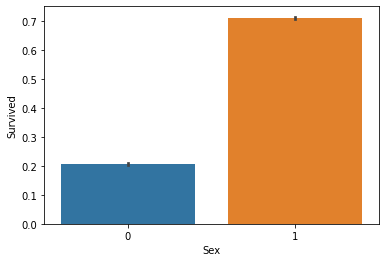

In [11]:
train_data['Sex'] = train_data['Sex'].replace({'male': 0, 'female': 1})
sns.barplot(x='Sex', y='Survived', data=train_data)

Таким образом можно сделать вывод, что среди всех пассажиров Титаника, женщин действительно выжило больше, чем мужчин.

**(0.5 points)** Plot age distribution of the passengers. What is the average and the median age of survived and deceased passengers? Do age distributions differ for survived and deceased passengers? Why?

Text(0.5, 1.0, 'Age distribution of the passengers')

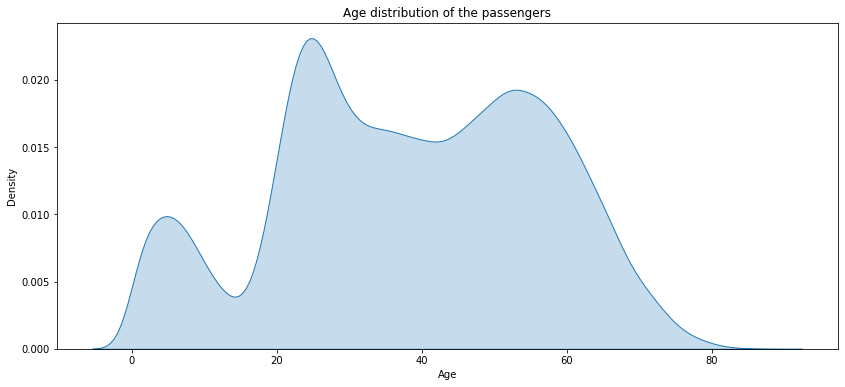

In [12]:
plt.figure(figsize=(14,6))
sns.kdeplot(data=train_data['Age'], shade=True).set_title('Age distribution of the passengers')

Найдем средний возраст выживших женщин и мужчин.

In [13]:
mean_feam_survived_age = round(train_data.loc[(train_data['Survived']==1) & (train_data['Sex']==1) & (train_data['Age'] > 0)].Age.mean(), 2)
print(mean_feam_survived_age)

mean_man_survived_age = round(train_data.loc[(train_data['Survived']==1) & (train_data['Sex']==0) & (train_data['Age'] > 0)].Age.mean(), 2)
print(mean_man_survived_age)

41.27
38.6


Теперь найдем средний возраст погибших.

In [14]:
mean_feam_dead_age = round(train_data.loc[(train_data['Survived']==0) & (train_data['Sex']==1) & (train_data['Age'] > 0)].Age.mean(), 2)
print(mean_feam_dead_age)

mean_man_dead_age = round(train_data.loc[(train_data['Survived']==0) & (train_data['Sex']==0) & (train_data['Age'] > 0)].Age.mean(), 2)
print(mean_man_dead_age)

37.01
36.62


Медианные значения выживших.

In [15]:
median_feam_survived_age = round(train_data.loc[(train_data['Survived']==1) & (train_data['Sex']==1) & (train_data['Age'] > 0)].Age.median(), 2)
print(median_feam_survived_age)

median_man_survived_age = round(train_data.loc[(train_data['Survived']==1) & (train_data['Sex']==0) & (train_data['Age'] > 0)].Age.median(), 2)
print(median_man_survived_age)

44.0
40.0


Медианные значения погибших.

In [16]:
median_feam_dead_age = round(
    train_data.loc[(train_data['Survived'] == 0) & (train_data['Sex'] == 1) & (train_data['Age'] > 0)].Age.median(), 2)
print(median_feam_dead_age)

median_man_dead_age = round(
    train_data.loc[(train_data['Survived'] == 0) & (train_data['Sex'] == 0) & (train_data['Age'] > 0)].Age.median(), 2)
print(median_man_dead_age)

38.0
35.0


Теперь проверим, зависит ли выживаемость от возраста:

<AxesSubplot:xlabel='Survived', ylabel='Age'>

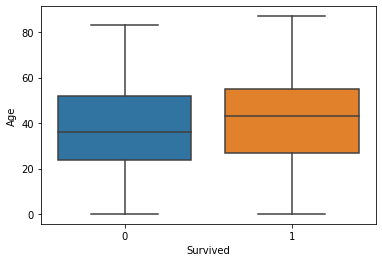

In [17]:
sns.boxplot(x=train_data['Survived'], y=train_data['Age'])

На графике видно, что преимущественно остались в живых более взрослые пассажиры корабля.

Средний и медианный возраст выживших женщин составляет: 41 и 44 года соответственно. Погибших: 37 и 38 лет.

Средний и медианный возраст выживших мужчин: 38 и 40 лет. Погибших: 36 и 35 лет.


**(1 point)** Explore "passenger class" and "embarked" features. What class was "the safest"? Is there any relationship between the embarkation port and the survival? Provide the corresponding visualizations.

Теперь проверим корреляцию между классом каюты и количеством выживших пассажиров.

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

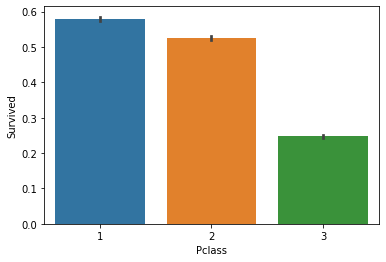

In [18]:
sns.barplot(x=train_data['Pclass'], y=train_data['Survived'])

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

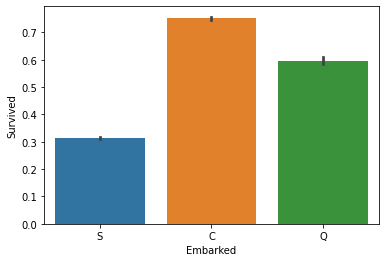

In [19]:
sns.barplot(x=train_data['Embarked'], y=train_data['Survived'])

Теперь посмотрим зависимость выживания от палубы. Для этого оставим только букву в ее названии.

In [20]:
train_data['Cabin'] = train_data['Cabin'].map(lambda x: str(x)[:1])
test_data['Cabin'] = test_data['Cabin'].map(lambda x: str(x)[:1])

<AxesSubplot:xlabel='Cabin', ylabel='Survived'>

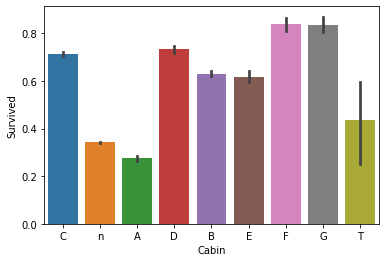

In [21]:
sns.barplot(x=train_data['Cabin'], y=train_data['Survived'])

Таким образом самым безопасным можно считать 1 класс. А также палубы F, G, C, D. Также, среди выживших пассажиров большинство село в порту Cherbourg. Возможно, в данном порту садились в основном богатые люди, возастом 39-43года, что позволило им выжить.

### Modelling

**(0.5 points)** Find the percentage of missing values for each feature. 

In [22]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Survived  100000 non-null  int64  
 1   Pclass    100000 non-null  int64  
 2   Name      100000 non-null  object 
 3   Sex       100000 non-null  int64  
 4   Age       96708 non-null   float64
 5   SibSp     100000 non-null  int64  
 6   Parch     100000 non-null  int64  
 7   Ticket    95377 non-null   object 
 8   Fare      99866 non-null   float64
 9   Cabin     100000 non-null  object 
 10  Embarked  99750 non-null   object 
dtypes: float64(2), int64(5), object(4)
memory usage: 9.2+ MB


In [23]:
for i in train_data.columns:
    print(f'{i} - ', train_data[i].isnull().sum() * 100 / len(train_data), '%')

Survived -  0.0 %
Pclass -  0.0 %
Name -  0.0 %
Sex -  0.0 %
Age -  3.292 %
SibSp -  0.0 %
Parch -  0.0 %
Ticket -  4.623 %
Fare -  0.134 %
Cabin -  0.0 %
Embarked -  0.25 %


In [24]:
train_data['Age'].fillna(0, inplace=True)
male_survived = train_data.loc[(train_data['Age']==0.00) & (train_data['Sex']==0)].groupby('Survived').agg({'Survived': 'count'})
print(male_survived)
female_survived = train_data.loc[(train_data['Age']==0.00) & (train_data['Sex']==1)].groupby('Survived').agg({'Survived': 'count'})
print(female_survived)

          Survived
Survived          
0             1517
1              390
          Survived
Survived          
0              419
1              966


Можно заметить, что среди мужчин с пропущенным значением возраста преобладает количество погибших, у женщин же - обратная ситуация. Таким образом, пропущенные значения возраста мужчин можно заполнить средним значением возраста погибших мужчин, а у женщин - средним значением возраста выживших женщин.

In [25]:

train_data.loc[(train_data['Sex'] == 0) & (train_data['Age'] == 0.00), 'Age'] = 36.62
train_data.loc[(train_data['Sex'] == 1) & (train_data['Age'] == 0.00), 'Age'] = 41.27

Остальные пропущенные значения заполним соответствующими модами.

In [26]:
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0],inplace=True)
train_data['Embarked'] = train_data['Embarked'].replace({'S': 0, 'C': 1, 'Q': 2})
train_data['Ticket'].fillna(train_data['Ticket'].mode()[0], inplace=True)
train_data['Fare'].fillna(train_data['Fare'].mode()[0], inplace=True)
train_data['Cabin'].fillna(train_data['Cabin'].mode()[0], inplace=True)
train_data['Family'] = train_data.SibSp + train_data.Parch

In [27]:
train_data['Cabin'] = train_data['Cabin'].replace({'A': 0, 'n': 0, 'T': 2, 'B': 2, 'E': 2, 'C': 1, 'D': 1, 'F': 1, 'G': 1})
test_data['Cabin'] = test_data['Cabin'].replace({'A': 0, 'n': 0, 'T': 2, 'B': 2, 'E': 2, 'C': 1, 'D': 1, 'F': 1, 'G': 1})

<AxesSubplot:xlabel='Cabin', ylabel='Survived'>

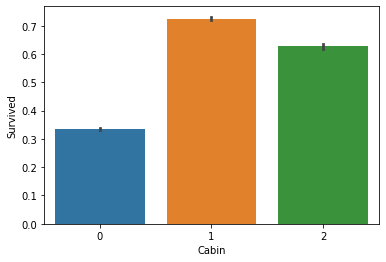

In [28]:
sns.barplot(x=train_data['Cabin'], y=train_data['Survived'])

In [29]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 100000 to 199999
Data columns (total 10 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Pclass    100000 non-null  int64  
 1   Name      100000 non-null  object 
 2   Sex       100000 non-null  object 
 3   Age       96513 non-null   float64
 4   SibSp     100000 non-null  int64  
 5   Parch     100000 non-null  int64  
 6   Ticket    94819 non-null   object 
 7   Fare      99867 non-null   float64
 8   Cabin     100000 non-null  int64  
 9   Embarked  99723 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 8.4+ MB


In [30]:
test_data['Sex'] = test_data['Sex'].replace({'male': 0, 'female': 1})

In [31]:
test_data['Age'].fillna(0, inplace=True)
test_data.loc[(test_data['Sex'] == 0) & (test_data['Age'] == 0.00), 'Age'] = 36.62
test_data.loc[(test_data['Sex'] == 1) & (test_data['Age'] == 0.00), 'Age'] = 41.27
test_data['Embarked'].fillna(test_data['Embarked'].mode()[0],inplace=True)
test_data['Embarked'] = test_data['Embarked'].replace({'S': 0, 'C': 1, 'Q': 2})
test_data['Fare'].fillna(test_data['Fare'].mode()[0], inplace=True)
test_data['Cabin'].fillna(test_data['Cabin'].mode()[0], inplace=True)
test_data['Family'] = test_data.SibSp + test_data.Parch

In [32]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 100000 to 199999
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Pclass    100000 non-null  int64  
 1   Name      100000 non-null  object 
 2   Sex       100000 non-null  int64  
 3   Age       100000 non-null  float64
 4   SibSp     100000 non-null  int64  
 5   Parch     100000 non-null  int64  
 6   Ticket    94819 non-null   object 
 7   Fare      100000 non-null  float64
 8   Cabin     100000 non-null  int64  
 9   Embarked  100000 non-null  int64  
 10  Family    100000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 9.2+ MB


<AxesSubplot:>

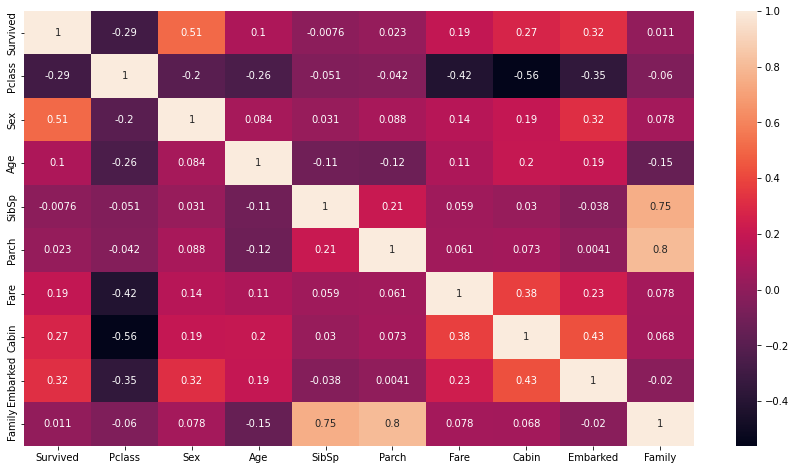

In [33]:
plt.figure(figsize = (15,8))
sns.heatmap(train_data.corr(), annot=True)

Think about the ways to handle these missing values for modelling and write your answer below. Which methods would you suggest? What are their advantages and disadvantages?

Пропущенные значения возраста были заполнены средним возрастов выживших\погибших в зависимости от пола. Для зполнения категориальных признаков была выбрана мода, так как она отображает наиболее часто встречаемые значения фичей. Преимущества 1 способа заключается в том, что он, по сути, не окажет сильного влияния на наши данные, так как возраст был выбран в зависимости от выживаемости пассажира с пропущенным значением. Второй способ также не окажет сильного влияния, однако в данной ситуации он будет не таким точным, как первый, так как он ни к чему не привязан (к выживаемости например), в этом и заключается его недостаток.

**(1.5 points)** Prepare the features and train two models (KNN and Logistic Regression) to predict the survival. Compare the results. Use accuracy as a metric. Don't forget about cross-validation!

In [34]:
X_train_features = train_data.drop(columns=['Name', 'Ticket', 'Family', 'Age', 'SibSp', 'Parch']).loc[:, 'Pclass':]
y_train_target = train_data.loc[:, 'Survived']
X_test_features = test_data.drop(columns=['Name', 'Ticket', 'Family', 'Age', 'SibSp', 'Parch']).loc[:, 'Pclass':]
X_train_features

,Pclass,Sex,Fare,Cabin,Embarked
PassengerId,,,,,
0,1,0,27.14,1,0
1,3,0,13.35,0,0
2,3,0,71.29,0,0
3,3,0,13.04,0,0
4,3,0,7.76,0,0
...,...,...,...,...,...
99995,2,1,14.86,1,1
99996,2,0,11.15,0,0
99997,3,0,9.95,0,0


### KNN MODEL

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_train_features, y_train_target, test_size=0.3, random_state=42)


Найдем количество соседей, при котором будет наибольшая точность.

In [36]:
neighbors = range(1, 30)
scores = []
for k in neighbors:
    knn_model = KNeighborsClassifier(n_neighbors=k, metric='euclidean').fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

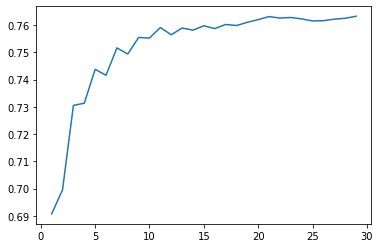

In [37]:
plt.plot(neighbors, scores)

In [38]:
max(scores)


0.7632666666666666

In [39]:
from sklearn.model_selection import cross_val_score
knn_model = KNeighborsClassifier(n_neighbors=9, metric='euclidean')
scores = cross_val_score(knn_model, X_train, y_train, cv=35, scoring='accuracy')


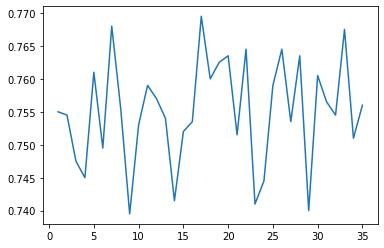

In [40]:
K_folds = range(1,36)
plt.plot(K_folds, scores)

In [41]:
max(scores)

0.7695

In [42]:
knn_model = KNeighborsClassifier(n_neighbors=29, metric='euclidean', weights='distance').fit(X_train, y_train)
y_predict = knn_model.predict(X_test)
accuracy_score(y_test, y_predict)
x = knn_model.predict(X_test_features)
#На каггле максимум был всего лишь 0.55. Не понимаю, что делаю не так, поэтому буду очень рада любым разъяснениям

In [44]:
res = pd.DataFrame()
res['Survived'], res['PassengerId'] = x[1:419], range(892, 1310)
res = res.set_index('PassengerId')
answ = res.to_csv('knn3.csv')
p = pd.read_csv('knn3.csv').set_index('PassengerId')
p.to_csv('knn4.csv')

### Logistic regression

In [45]:
from sklearn.linear_model import LogisticRegression
Logreg_model = LogisticRegression(penalty='l2').fit(X_train, y_train)
Logreg_model.predict(X_test)
Logreg_model.score(X_train, y_train)

0.7597

In [46]:
pred = Logreg_model.predict(X_test_features)
#На каггле закончились возможности засабмитить свои данные, поэтому про логическую регрессию не знаю

**(0.5 + X points)** Try more feature engineering and hyperparameter tuning to improve the results. You may use either KNN or Logistic Regression (or both).

Select the best model, load the test set and make the predictions. Submit them to kaggle and see the results :)

**Note**. X points will depend on your kaggle public leaderboard score.
$$ f(score) = 1.0, \ \ 0.79 \leq score < 0.80,$$
$$ f(score) = 2.5, \ \ 0.80 \leq score < 0.81,$$ 
$$ f(score) = 4.0, \ \ 0.81 \leq score $$ 
Your code should generate the output submitted to kaggle. Fix random seeds to make the results reproducible.